## Magnetostratigraphy

**Plots magnetostratigraphic data in a thickness vs dec, inc and VGP latitude.** 
*Input data in an excel file with following headers:*

|header      |Description                                             | 
|:-----------|:-------------------------------------------------------|
|sample      |Sample code (name)                                      |
|level (m)   |Stratigraphic thickness in meters                       |
|Ds          |declination in stratigraphic coordinates                |
|Is          |Inclination in stratigraphic coordinates                |
|Q           |Quality rank ChRM -->[1,2,3] Secondary components --> 4 |

The order and number of columns is not predetermined. Extra columns are allowed

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt # our plotting buddy
from pmagpy import convert_2_magic as convert
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
from IPython.display import Image
%matplotlib inline 

### Reading input excel file

In [2]:
#set path to data file. excel file with column headings as "site", "level (m)", "Ds", "Is"
#path not required if notebook located in the same folder"
path = ''        # ADD SUBFOLDERS FROM WORKING DIR IF NEEDED. ex: Pobla_Lillet/
site_name = 'MySite'
file = path+'MySite_Dir_VGP.xlsx'

In [3]:
#reading input data file
xls = pd.ExcelFile(file)
chrm_directions = xls.parse(0) #first sheet (0) of the excel file parsed to variable

In [4]:
#shaping data frame
#chrm_directions = chrm_directions.set_index('sample')
# delete rows with directions of Q=4, secondary viscous component
#chrm_directions = chrm_directions[chrm_directions.Q != 4]
# erase rows without stratigraphic level ["level (m)"]
chrm_directions = chrm_directions.dropna(subset=['level (m)'])
# sort table by stratigraphic position
chrm_directions = chrm_directions.sort_values(by=['level (m)'])

### Magnetic polarity stratigraphy plot

In [5]:
chrm_directions.round(0)

sample  level (m)     Ds    Is  Int(E-6A/m)  error  Q  Temp  \
0   LL-01A           0.0  188.0 -20.0        162.0   10.0  2     4   
1   LL-02A           2.0  157.0 -24.0       1109.0    8.0  1     1   
2   LL-03A           3.0  173.0 -33.0        801.0    6.0  1     2   
3   LL-04A           3.0   20.0 -65.0        470.0   16.0  1     2   
4   LL-05A           6.0  184.0 -53.0        189.0    9.0  1     2   
..        ...        ...    ...   ...          ...    ... ..   ...   
62  LL-64B         132.0  270.0 -28.0         73.0   16.0  2     4   
63  LL-66B         135.0  137.0  -8.0         90.0    6.0  3     4   
64  LL-67A         135.0  155.0  16.0         59.0    8.0  3     4   
65  LL-68A         137.0  150.0 -68.0         45.0   18.0  3     4   
66  LL-69          157.0   41.0  37.0        305.0    9.0  3     2   

         comments  VGP lat  
0      320-410 tc    -62.0  
1    * 200-620 tc    -57.0  
2    * 350-590 tc    -69.0  
3    * 350-560 tc      3.0  
4      280-500 tc    -84.0  
..            ...      ...  
62     280-350 tc     -9.0  
63     280-320 tc    -38.0  
64     280-380 tc    -39.0  
65     350-440 tc    -65.0  
66     350-500 tc     51.0  

[67 rows x 10 columns]

In [6]:
#convert declination data from 90-450
dec = chrm_directions['Ds']
inc = chrm_directions['Is']
chrm_directions["newdec"] = ""
newdec = chrm_directions["newdec"]
for value in range(len(chrm_directions)):
    if dec[value] < 90:
        newdec[value] = dec[value]+360
    else:
        newdec[value] = dec[value]

In [7]:
##sorting data by Quality 'Q'

ChRM = chrm_directions[chrm_directions["Q"] <=2]     # Take  directions of Q=1 and Q=2
ChRM_Q3 = chrm_directions[chrm_directions["Q"] ==3]  # Take directions of Q=3

print("Total Number of directions:", len(chrm_directions))
print("Directions of Quality 1:", len(chrm_directions[chrm_directions["Q"]==1]),",", round(100*len(chrm_directions[chrm_directions["Q"]==1])/len(chrm_directions),1),"%")
print("Directions of Quality 2:", len(chrm_directions[chrm_directions["Q"]==2]),",", round(100*len(chrm_directions[chrm_directions["Q"]==2])/len(chrm_directions),1),"%")
print("Directions of Quality 3:", len(chrm_directions[chrm_directions["Q"]==3]),",", round(100*len(chrm_directions[chrm_directions["Q"]==3])/len(chrm_directions),1),"%")

Total Number of directions: 67
Directions of Quality 1: 37 , 55.2 %
Directions of Quality 2: 11 , 16.4 %
Directions of Quality 3: 17 , 25.4 %


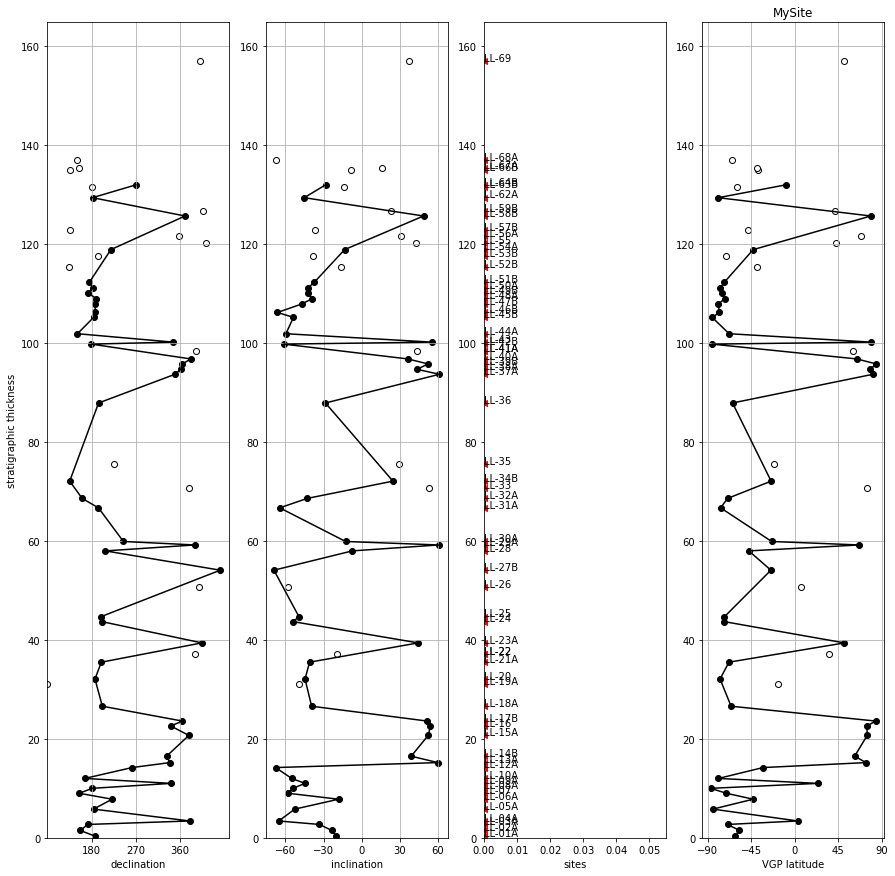

In [8]:
#plotting instructions

plt.subplots(figsize=(15, 15))

plt.subplot(1, 4, 1)
plt.plot(ChRM["newdec"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM["newdec"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM_Q3["newdec"],ChRM_Q3["level (m)"], color ='white', edgecolor ='black')
plt.xlim(left =90, right = 460)
plt.xticks(np.arange(180, 361, 90))
plt.xlabel("declination")
plt.ylim(bottom = 0)
#plt.yticks(np.arange(0, 111, 10))
plt.ylabel("stratigraphic thickness")
plt.grid(which='major', axis='both', linestyle='-')

plt.subplot(1, 4, 2)
plt.plot(ChRM["Is"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM["Is"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM_Q3["Is"],ChRM_Q3["level (m)"], color ='white', edgecolor ='black')
plt.xticks(np.arange(-60, 61, 30))
plt.xlabel("inclination")
plt.ylim(bottom = 0)
#plt.yticks(np.arange(0, 111, 10))
plt.grid(which='major', axis='both', linestyle='-')

plt.subplot(1, 4, 3)

# annotate sample names
chrm_directions['zeros'] = 0
plt.scatter(chrm_directions['zeros'],chrm_directions["level (m)"], color ='red', marker = '<')

for idx, row in chrm_directions.iterrows():
    plt.annotate(row['sample'],(row['zeros'], row['level (m)']))

plt.xlabel("sites")
plt.ylim(bottom = 0)
plt.xlim(left = 0)
#plt.yticks(np.arange(0, 111, 10))
#plt.grid(which='major', axis='both', linestyle='-')

plt.subplot(1, 4, 4)
plt.plot(ChRM["VGP lat"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM["VGP lat"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM_Q3["VGP lat"],ChRM_Q3["level (m)"], color ='white', edgecolor ='black')
plt.xticks(np.arange(-90, 91, 45))
plt.xlabel("VGP latitude")
plt.ylim(bottom = 0)
#plt.yticks(np.arange(0, 111, 10))
# Add the grid
plt.grid(which='major', axis='both', linestyle='-')

plt.title(site_name)

# saving plot to file
plt.savefig(site_name+'_mgstrt.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

plt.show()